# Creating a Custome Database

In [9]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create tables
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS products")
cursor.execute("DROP TABLE IF EXISTS customers")
cursor.execute("DROP TABLE IF EXISTS categories")

cursor.execute("""
CREATE TABLE categories (
    category_id INTEGER PRIMARY KEY,
    category_name TEXT
)
""")

cursor.execute("""
CREATE TABLE products (
    product_id INTEGER PRIMARY KEY,
    name TEXT,
    price REAL,
    category_id INTEGER,
    FOREIGN KEY (category_id) REFERENCES categories(category_id)
)
""")

cursor.execute("""
CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT,
    region TEXT
)
""")

cursor.execute("""
CREATE TABLE sales (
    sale_id INTEGER PRIMARY KEY,
    product_id INTEGER,
    customer_id INTEGER,
    quantity INTEGER,
    sale_date TEXT,
    FOREIGN KEY (product_id) REFERENCES products(product_id),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
)
""")

# Insert categories
cursor.executemany("INSERT INTO categories (category_name) VALUES (?)", [
    ("Fruits",),
    ("Beverages",),
    ("Snacks",)
])

# Insert products
cursor.executemany("INSERT INTO products (name, price, category_id) VALUES (?, ?, ?)", [
    ("Apple", 2.0, 1),
    ("Orange", 1.5, 1),
    ("Banana", 1.0, 1),
    ("Juice", 3.0, 2),
    ("Soda", 2.5, 2),
    ("Chips", 2.0, 3),
])

# Insert customers
cursor.executemany("INSERT INTO customers (name, region) VALUES (?, ?)", [
    ("Alice", "North"),
    ("Bob", "South"),
    ("Charlie", "East"),
    ("David", "West")
])

# Insert sales
cursor.executemany("INSERT INTO sales (product_id, customer_id, quantity, sale_date) VALUES (?, ?, ?, ?)", [
    (1, 1, 10, "2025-04-01"),
    (2, 2, 5, "2025-04-01"),
    (3, 3, 8, "2025-04-02"),
    (4, 1, 3, "2025-04-02"),
    (5, 4, 6, "2025-04-03"),
    (6, 2, 7, "2025-04-03"),
    (1, 3, 5, "2025-04-04"),
    (2, 4, 6, "2025-04-04"),
    (5, 1, 2, "2025-04-05"),
    (3, 2, 10, "2025-04-05"),
])

conn.commit()
conn.close()


# Display the Tables in Database

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = "SELECT * FROM sqlite_master;"
df = pd.read_sql_query(query, conn)
print("Tables in the database:")
print(df)


Tables in the database:
    type        name    tbl_name  rootpage  \
0  table  categories  categories         2   
1  table    products    products         3   
2  table   customers   customers         4   
3  table       sales       sales         5   

                                                 sql  
0  CREATE TABLE categories (\n    category_id INT...  
1  CREATE TABLE products (\n    product_id INTEGE...  
2  CREATE TABLE customers (\n    customer_id INTE...  
3  CREATE TABLE sales (\n    sale_id INTEGER PRIM...  


# Display Data with Pandas

  product  total_quantity  revenue
0   Apple              15     30.0
1    Soda               8     20.0
2  Banana              18     18.0
3  Orange              11     16.5
4   Chips               7     14.0
5   Juice               3      9.0


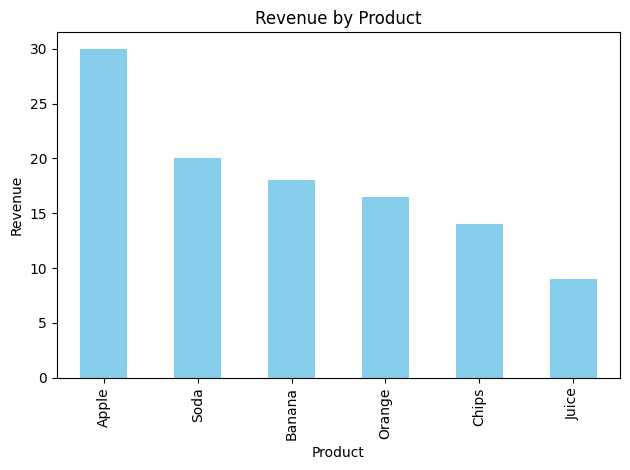

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

# Modified Query with JOINs
query = """
SELECT p.name AS product,
       SUM(s.quantity) AS total_quantity,
       SUM(s.quantity * p.price) AS revenue
        FROM sales s
        JOIN products p ON s.product_id = p.product_id
        GROUP BY p.name
        ORDER BY revenue DESC
"""

# Load results into DataFrame
df = pd.read_sql_query(query, conn)
print(df)

# Plot Revenue by Product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


# Total Revenue by Product and Category


In [12]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
       SELECT p.name AS product, 
       c.category_name,
       SUM(s.quantity * p.price) AS revenue
       FROM sales s
       JOIN products p ON s.product_id = p.product_id
       JOIN categories c ON p.category_id = c.category_id
       GROUP BY p.name
       ORDER BY revenue DESC
 """

df = pd.read_sql_query(query, conn)
print(df)


  product category_name  revenue
0   Apple        Fruits     30.0
1    Soda     Beverages     20.0
2  Banana        Fruits     18.0
3  Orange        Fruits     16.5
4   Chips        Snacks     14.0
5   Juice     Beverages      9.0


#  Top 3 Customers by Total Purchase Value

In [13]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT cu.name AS customer,
        SUM(s.quantity * p.price) AS total_spent
        FROM sales s
        JOIN products p ON s.product_id = p.product_id
        JOIN customers cu ON s.customer_id = cu.customer_id
        GROUP BY cu.customer_id
        ORDER BY total_spent DESC
        LIMIT 3

 """

df = pd.read_sql_query(query, conn)
print(df)


  customer  total_spent
0    Alice         34.0
1      Bob         31.5
2    David         24.0


# Daily Sales and Revenue Trend

In [14]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT s.sale_date,
       SUM(s.quantity) AS total_qty,
       SUM(s.quantity * p.price) AS total_revenue
        FROM sales s
        JOIN products p ON s.product_id = p.product_id
        GROUP BY s.sale_date
        ORDER BY s.sale_date


 """

df = pd.read_sql_query(query, conn)
print(df)

    sale_date  total_qty  total_revenue
0  2025-04-01         15           27.5
1  2025-04-02         11           17.0
2  2025-04-03         13           29.0
3  2025-04-04         11           19.0
4  2025-04-05         12           15.0


# Region-Wise Sales Performance

In [ ]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT cu.region,
        SUM(s.quantity * p.price) AS total_revenue
        FROM sales s
        JOIN customers cu ON s.customer_id = cu.customer_id
        JOIN products p ON s.product_id = p.product_id
        GROUP BY cu.region
 """

df = pd.read_sql_query(query, conn)
print(df)

  region  total_revenue
0   East           18.0
1  North           34.0
2  South           31.5
3   West           24.0


# Most Popular Category (by quantity sold)

In [18]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT cat.category_name,
       SUM(s.quantity) AS total_sold
        FROM sales s
        JOIN products p ON s.product_id = p.product_id
        JOIN categories cat ON p.category_id = cat.category_id
        GROUP BY cat.category_id
        ORDER BY total_sold DESC
        LIMIT 1
 """

df = pd.read_sql_query(query, conn)
print(df)

  category_name  total_sold
0        Fruits          44


# Average Basket Size (items per transaction)

In [19]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT ROUND(AVG(quantity), 2) AS avg_basket_size
        FROM sales

 """

df = pd.read_sql_query(query, conn)
print(df)

   avg_basket_size
0              6.2


# Monthly Revenue

In [20]:
import sqlite3

# Connect to the updated DB
conn = sqlite3.connect("sales_data.db")

query = """
        SELECT strftime('%Y-%m', sale_date) AS month,
        SUM(s.quantity * p.price) AS monthly_revenue
        FROM sales s
        JOIN products p ON s.product_id = p.product_id
        GROUP BY month
        ORDER BY month

 """

df = pd.read_sql_query(query, conn)
print(df)

     month  monthly_revenue
0  2025-04            107.5
